In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import brown
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Input, Model
from tensorflow.keras import  optimizers
from keras.layers import Bidirectional, LSTM, Embedding, RepeatVector, Dense
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [2]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
%matplotlib notebook

# misc
import random as rn

In [3]:
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('evaluation.xlsx')

In [4]:
pair_data = []
for i in range(train_data.shape[0]):
    pair_data.append(train_data.iloc[i][0] +' '+ train_data.iloc[i][1])

## Sent2vec

In [5]:
#embedding_matrix

embedding_index = dict()
f = open('/home/rohit/datasets/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coef
f.close()
print('Loaded %s word vectors.' % len(embedding_index))

Loaded 400000 word vectors.


In [6]:
t = Tokenizer()
t.fit_on_texts(pair_data)

In [7]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size,300))
for word,i in  t.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Null word embeddings: 146


In [8]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embedding_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [9]:
pair_data

['this is an amazing app for online classes!but good app for conducting online classes',
 'very practical and easy to use app is user-friendly',
 'this app is very good for video conferencing. good for video conferencing',
 'i can not download this zoom app unable to download zoom app',
 'i am not able to download this app want to download the app',
 'zoom is not working properly app is not working',
 'zoom is an excellent meeting app. good app for conducting online meeting',
 'i am not getting the virtual background option in the settings unable to switch virtual background',
 'video quality is very poor video quality is poor',
 'i am unable to sign-in want to login',
 'zoom does not update me anymore want to update zoom app',
 'the app does not install unable to install',
 'best app for video calling and office meeting and online classes good app for conducting online classes and meetings',
 'i can not connect to my meeting. want to connect to meetings',
 'my audio is not working ple

In [10]:
s1 = 'this is an amazing app for online classes!but good app for conducting online classes'
word_tokenize(s1)

['this',
 'is',
 'an',
 'amazing',
 'app',
 'for',
 'online',
 'classes',
 '!',
 'but',
 'good',
 'app',
 'for',
 'conducting',
 'online',
 'classes']

In [9]:
avg_w2v = [sent2vec(x) for x in pair_data]

In [12]:
avg_w2v[0]

array([-1.16088994e-01,  1.88608617e-02,  4.71798852e-02, -3.07366513e-02,
       -2.68337242e-02,  1.80341266e-02, -3.14496830e-03, -3.06523442e-02,
        2.58375704e-02, -2.81234592e-01,  1.86086036e-02,  2.40477771e-02,
       -3.01381554e-02, -3.12046930e-02,  1.97143201e-02,  2.01026369e-02,
        4.13502147e-03, -2.70033982e-02,  7.23056402e-03,  4.22744639e-02,
        2.21470315e-02,  2.92642284e-02, -1.87659916e-02,  7.99892396e-02,
       -1.19627593e-02,  3.44845578e-02,  2.08559446e-02,  3.64630036e-02,
        3.74165624e-02,  1.78028233e-02, -8.25805869e-03, -1.44078322e-02,
        2.83181593e-02, -4.11029458e-02, -2.23856464e-01,  6.06711134e-02,
       -4.23972830e-02,  1.41167417e-02, -2.95268465e-02,  1.06758727e-02,
        1.41036203e-02, -5.10259978e-02, -1.56256575e-02,  9.36901942e-02,
        5.48801618e-03, -4.28624749e-02,  1.67505369e-01,  2.04129014e-02,
        3.23385596e-02, -3.92384119e-02,  5.39263673e-02, -6.60256809e-03,
        1.07655860e-02, -

In [10]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [11]:


# get normalization parameters by fitting to the training data
pipeline.fit(avg_w2v);



In [12]:


# transform the training and validation data with these parameters
avg_w2v_transformed = pipeline.transform(avg_w2v)

In [13]:
avg_w2v_transformed

array([[0.32952544, 0.52847457, 0.7069768 , ..., 0.551263  , 0.47151554,
        0.5139356 ],
       [0.58811235, 0.33977813, 0.73796225, ..., 0.38813567, 0.6412678 ,
        0.759206  ],
       [0.470594  , 0.6463275 , 0.6269196 , ..., 0.6599205 , 0.3487683 ,
        0.39087462],
       ...,
       [0.5941639 , 0.5011784 , 0.5294606 , ..., 0.2908829 , 0.4486799 ,
        0.6451291 ],
       [0.63951397, 0.6963707 , 0.59029967, ..., 0.56190395, 0.55409694,
        0.4996945 ],
       [0.4608038 , 0.61669815, 0.35712457, ..., 0.38496512, 0.422633  ,
        0.72894746]], dtype=float32)

In [17]:
# g = sns.PairGrid(avg_w2v_transformed)
# plt.subplots_adjust(top=0.9)
# g.fig.suptitle('Before:')
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot);

## One class SVM

In [24]:
from sklearn.svm import OneClassSVM
one_svm = OneClassSVM(gamma='auto', nu=0.001).fit(avg_w2v_transformed)

In [25]:

y_test_pred = one_svm.predict(avg_w2v_test_transformed)

In [26]:
res = []
for i in range(len(y_test_pred)):
    if y_test_pred[i] == -1:
        res.append(0)
    else:
        res.append(1)

In [27]:
from sklearn.metrics import classification_report,roc_auc_score
y_true = test_data['label'].values
print(classification_report(y_true,res))

              precision    recall  f1-score   support

         0.0       0.54      0.00      0.01      5999
         1.0       0.33      0.99      0.50      3001

    accuracy                           0.33      9000
   macro avg       0.44      0.50      0.25      9000
weighted avg       0.47      0.33      0.17      9000



In [28]:
roc_auc_score(y_true,res)

0.49883455528714965

In [16]:
avg_w2v_transformed.shape[1]

300

In [17]:
# data dimensions // hyperparameters 
input_dim = avg_w2v_transformed.shape[1]
BATCH_SIZE = 4
EPOCHS = 10

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    #tf.keras.layers.Dense(4, activation='elu'),
    #tf.keras.layers.Dense(2, activation='elu'),
    
    # reconstruction / decode
    #tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               90300     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4816      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 300)               5100      
Total params: 100,568
Trainable params: 100,568
Non-trainable params: 0
__________________________________________________

2023-01-13 22:07:22.456255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 22:07:22.463334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 22:07:22.463757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-13 22:07:22.464590: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [18]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

2023-01-13 22:07:27.530724: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-13 22:07:27.530744: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-13 22:07:27.530776: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2023-01-13 22:07:27.531110: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2023-01-13 22:07:27.531228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so'; dlerror: libcupti.so: cannot open shared object file: No such file or directory
2023-01-13 22:07:27.531244: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be 

In [19]:


history = autoencoder.fit(
    avg_w2v_transformed, avg_w2v_transformed,
    shuffle=True,
    epochs=30,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_split = 0.1
);



2023-01-13 22:07:33.709233: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
128/464 [=======>......................] - ETA: 0s - loss: 0.0670 - acc: 0.0098   

2023-01-13 22:07:34.278688: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2023-01-13 22:07:34.278708: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2023-01-13 22:07:34.278743: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.
2023-01-13 22:07:34.281644: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-01-13 22:07:34.281689: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1757] function cupti_interface_->Finalize()failed with error CUPTI could not be loaded or symbol could not be found.
2023-01-13 22:07:34.282486: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-01-13 22:07:34.283006: I tensorflow

464/464 [==============================] - 1s 2ms/step - loss: 0.0328 - acc: 0.0059 - val_loss: 0.0214 - val_acc: 0.0435
Epoch 2/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0195 - acc: 0.0156 - val_loss: 0.0206 - val_acc: 0.0048
Epoch 3/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0185 - acc: 0.0194 - val_loss: 0.0198 - val_acc: 0.0193
Epoch 4/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0179 - acc: 0.0270 - val_loss: 0.0195 - val_acc: 0.0290
Epoch 5/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0172 - acc: 0.0334 - val_loss: 0.0188 - val_acc: 0.0483
Epoch 6/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0167 - acc: 0.0388 - val_loss: 0.0187 - val_acc: 0.0386
Epoch 7/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0166 - acc: 0.0394 - val_loss: 0.0185 - val_acc: 0.0725
Epoch 8/30
464/464 [==============================] - 1s 2ms/step - loss: 0.0164 - acc:

## test data

In [15]:
test_data.head()

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0


In [16]:
test_pair = []
for i in range(test_data.shape[0]):
    test_pair.append(test_data.iloc[i][0]+' '+ test_data.iloc[i][1])

In [17]:
test_pair

['the app is crashing when i play a vedio app crashes during playback',
 'but i want to connect it to the tv from one device to another want compatibility with more smart televisions',
 'very helpful when and home working remotley good app for work',
 'this zoom so called and missed call and mobile number receiving incorrect phone number message',
 'one of my favorite apps good for spending time',
 'I have enjoyed watching my favorite shows and movies. good to watch shows',
 'we have not had internet for a month and a half we can not watch turktelekom not doing it bisey unable to access live tv',
 'this is great app when you download the video the video will be playing offline without adds . good app to download videos',
 'excellent app for video conferencing, the only drawback that with ipad pro m1, which is almost a pc, does not create rooms. want to record on ipad',
 'also, i can continue watching where i left off. unable to sync watched episodes',
 "sorry to say that a small issue 

In [18]:
avg_w2v_test = [sent2vec(x) for x in test_pair]

In [19]:
avg_w2v_test_transformed = pipeline.transform(avg_w2v_test)

In [23]:
len(avg_w2v_test_transformed)

9000

In [24]:
reconstructions = autoencoder.predict(avg_w2v_test_transformed)

In [25]:
y_test  = test_data['label']

In [26]:
y_test = y_test.to_numpy()

In [27]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

In [28]:


# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(avg_w2v_test_transformed - reconstructions, 2), axis=1)



In [29]:
avg_w2v_test_transformed

array([[0.4928704 , 0.58632565, 0.44909143, ..., 0.5298911 , 0.5625225 ,
        0.51122636],
       [0.58147717, 0.58207023, 0.50265855, ..., 0.4812855 , 0.6685809 ,
        0.61639595],
       [0.4825258 , 0.5791007 , 0.48209512, ..., 0.42570418, 0.45957032,
        0.7993115 ],
       ...,
       [0.57986736, 0.5286815 , 0.5222682 , ..., 0.33798933, 0.69966674,
        0.6199567 ],
       [0.52382267, 0.45345104, 0.6687057 , ..., 0.5791448 , 0.64727473,
        0.4743466 ],
       [0.79993856, 0.62454784, 0.49605915, ..., 0.5124568 , 0.36445415,
        0.5415106 ]], dtype=float32)

In [30]:
reconstructions

array([[0.3925402 , 0.49288002, 0.57147497, ..., 0.5926143 , 0.52048177,
        0.51236856],
       [0.55755275, 0.5770081 , 0.4733819 , ..., 0.5784422 , 0.49707907,
        0.6291011 ],
       [0.48935938, 0.502495  , 0.5282235 , ..., 0.4549404 , 0.44417828,
        0.6535662 ],
       ...,
       [0.5513326 , 0.51328224, 0.5121712 , ..., 0.43490356, 0.49166697,
        0.58676165],
       [0.5624809 , 0.6077008 , 0.53262144, ..., 0.53719246, 0.45682532,
        0.5219354 ],
       [0.5448606 , 0.58885044, 0.50884014, ..., 0.5178336 , 0.4513021 ,
        0.54418206]], dtype=float32)

In [31]:
mse

array([0.01613611, 0.00882182, 0.0089644 , ..., 0.01505124, 0.01399628,
       0.01347239], dtype=float32)

<IPython.core.display.Javascript object>


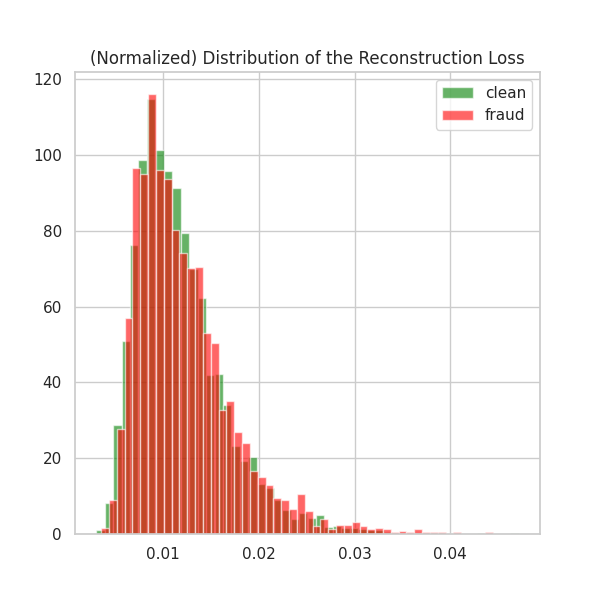

In [32]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [33]:


THRESHOLD = 3

def mad_score(points):
    """https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm """
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD



In [43]:
0.6745 *np.abs(mse-np.median(mse))/np.median(np.abs(mse-np.median(mse)))

array([1.3118405 , 0.47512743, 0.61289495, ..., 0.94365454, 1.0814998 ,
       0.8019278 ], dtype=float32)

In [34]:


print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")



Detected 294 outliers in a total of 9,000 transactions [3.27%].


In [37]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve,classification_report,roc_auc_score)

# get (mis)classification
cm = confusion_matrix(y_test, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

In [36]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=3 are as follows:
[[5827  172]
 [2879  122]]

% of transactions labeled as fraud that were correct (precision): 122/(172+122) = 41.50%
% of fraudulent transactions were caught succesfully (recall):    122/(2879+122) = 4.07%


In [38]:
print(classification_report(y_test, outliers))

              precision    recall  f1-score   support

         0.0       0.67      0.97      0.79      5999
         1.0       0.41      0.04      0.07      3001

    accuracy                           0.66      9000
   macro avg       0.54      0.51      0.43      9000
weighted avg       0.58      0.66      0.55      9000



In [39]:
roc_auc_score(y_test, outliers)

0.5059908351936252